In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('walmart.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
# Checking the dtypes as well as null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

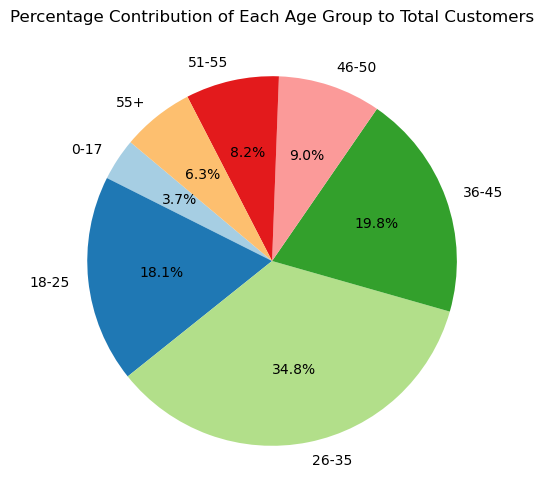

In [6]:
# Customers by each age group

unique_customer_df = df.drop_duplicates(subset=['User_ID'])
age_group_total = unique_customer_df.groupby('Age').size().reset_index(name='unique_customers')

plt.figure(figsize=(10,6))
plt.pie(age_group_total['unique_customers'], labels=age_group_total['Age'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(age_group_total))))
plt.title('Percentage Contribution of Each Age Group to Total Customers')

plt.show()

The age group 26-35 is the most common age group with 34.8% followed by 36-45 and 18-25 age group.

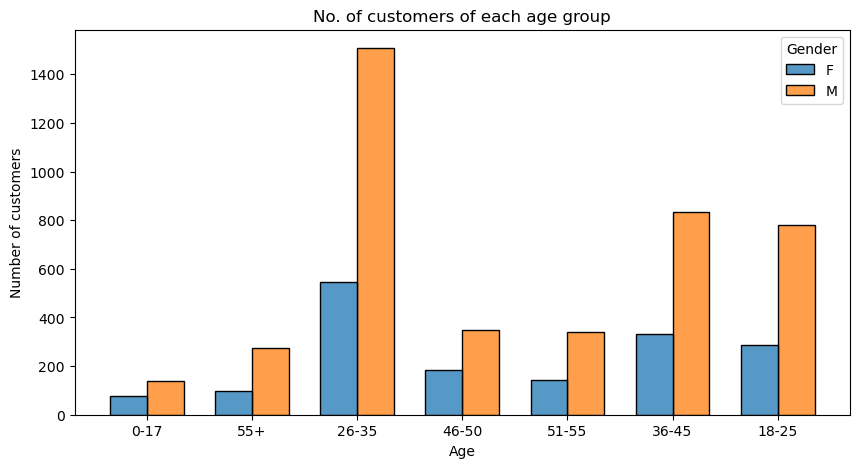

In [7]:
# No. of customers for each age group and gender

plt.figure(figsize=(10,5))
sns.histplot(data=unique_customer_df, x='Age', hue='Gender', multiple='dodge', discrete=True, shrink=0.7)
plt.title('No. of customers of each age group')
plt.xlabel('Age')
plt.ylabel('Number of customers')

plt.show()

The 26-35 age group has the most customers for both genders. The number of male customers in this category is relatively higher compared to other categories.

In [8]:
unique_purchase_df = df.groupby('User_ID')['Purchase'].sum().reset_index(name='Total_purchase')
merged_unique_purchase = pd.merge(df, unique_purchase_df, on='User_ID')
merged_unique_purchase.drop(columns='Purchase', inplace=True)
merged_unique_purchase = merged_unique_purchase.drop_duplicates(subset='User_ID')
merged_unique_purchase.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Total_purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,334093
35,1000002,P00285442,M,55+,16,C,4+,0,8,810472
112,1000003,P00193542,M,26-35,15,A,3,0,1,341635
141,1000004,P00184942,M,46-50,7,B,2,1,1,206468
155,1000005,P00274942,M,26-35,20,A,1,1,8,821001


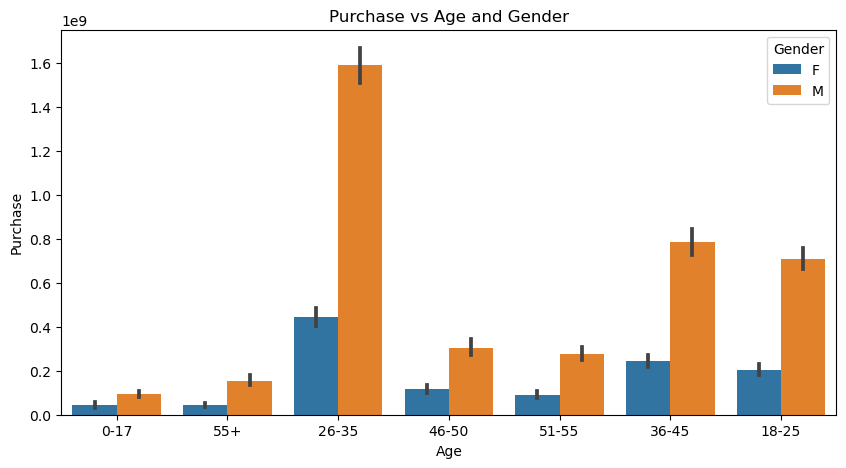

In [9]:
# Relation between purchase and age as well as gender of customer

plt.figure(figsize=(10, 5))
sns.barplot(data=merged_unique_purchase, x='Age', y='Total_purchase', hue='Gender', estimator=sum)
plt.title('Purchase vs Age and Gender')
plt.xlabel('Age')
plt.ylabel('Purchase')

plt.show()

A major portion of the purchase is done by 26-35 age group male category.

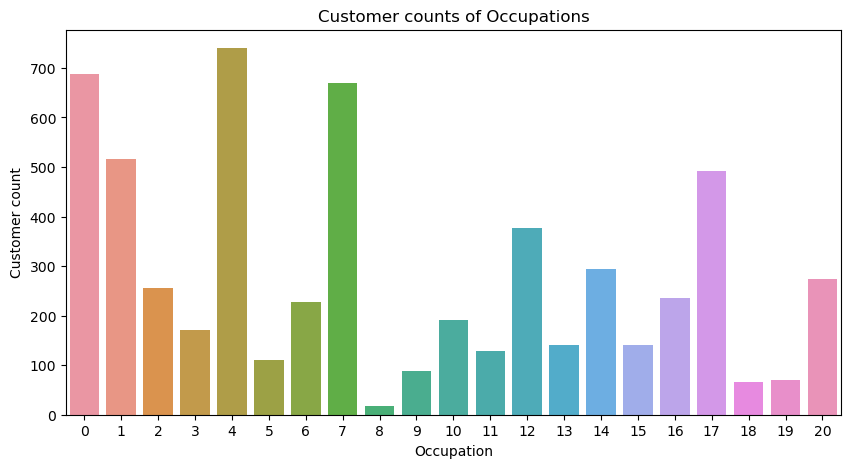

In [10]:
# Occupatoin frequency

occupation_counts = merged_unique_purchase.groupby('Occupation')['User_ID'].size().reset_index(name='Customer_count')
plt.figure(figsize=(10,5))
sns.barplot(data=occupation_counts, x='Occupation', y='Customer_count')
plt.title('Customer counts of Occupations')
plt.xlabel('Occupation')
plt.ylabel('Customer count')

plt.show()

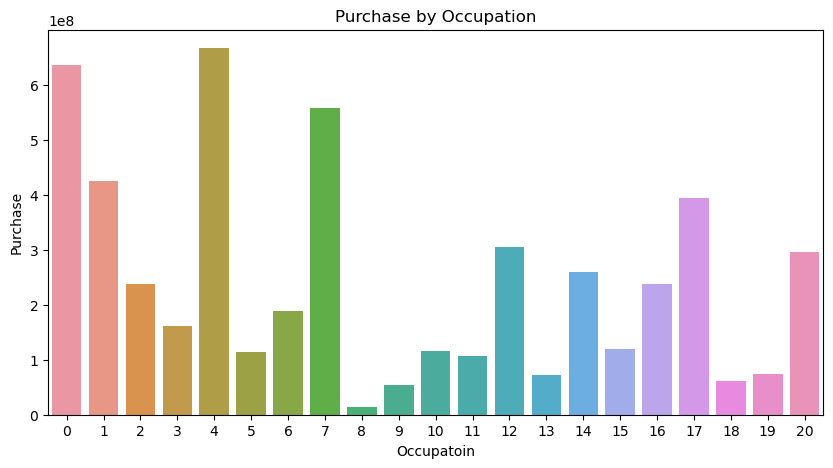

In [11]:
# Relation between Occupation and Purchase

plt.figure(figsize=(10, 5))
sns.barplot(data=merged_unique_purchase, x='Occupation', y='Total_purchase', estimator=sum, errorbar=None)
plt.title('Purchase by Occupation')
plt.xlabel('Occupatoin')
plt.ylabel('Purchase')

plt.show()

The customer count for 4, 0, 7 occupations are relatively greater which also increases their total purchase amount.

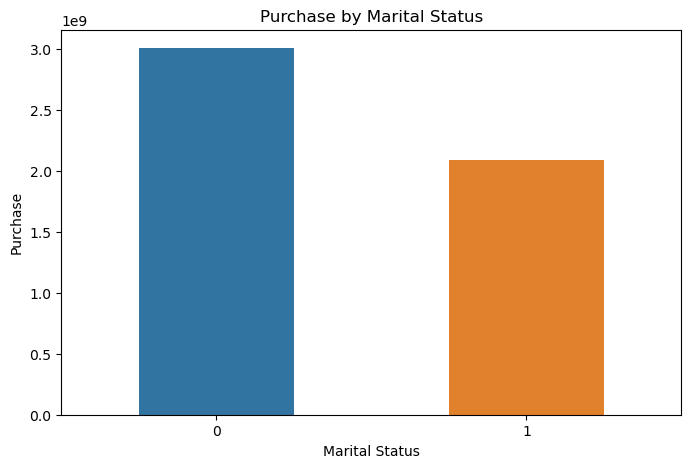

In [12]:
# Relation between Marital status and purchase

plt.figure(figsize=(8,5))
sns.barplot(data=merged_unique_purchase, x='Marital_Status', y='Total_purchase', width=0.5, errorbar=None, estimator=sum)
plt.title('Purchase by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Purchase')

plt.show()

Most purchase are made by non-married people

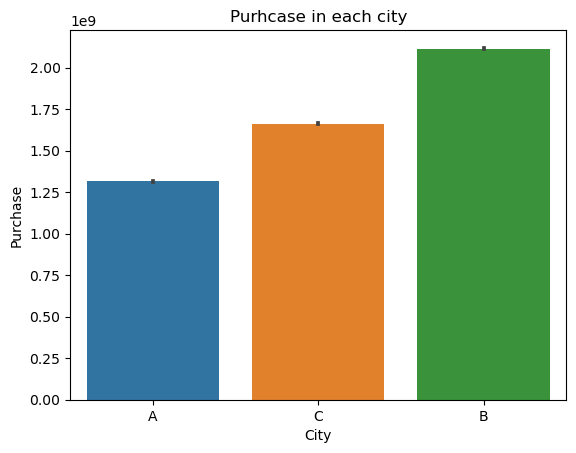

In [13]:
# Total purcahse for each city

sns.barplot(data=df, x='City_Category', y='Purchase', estimator=sum)
plt.title('Purhcase in each city')
plt.xlabel('City')
plt.ylabel('Purchase')

plt.show()

Text(0, 0.5, 'Customer count')

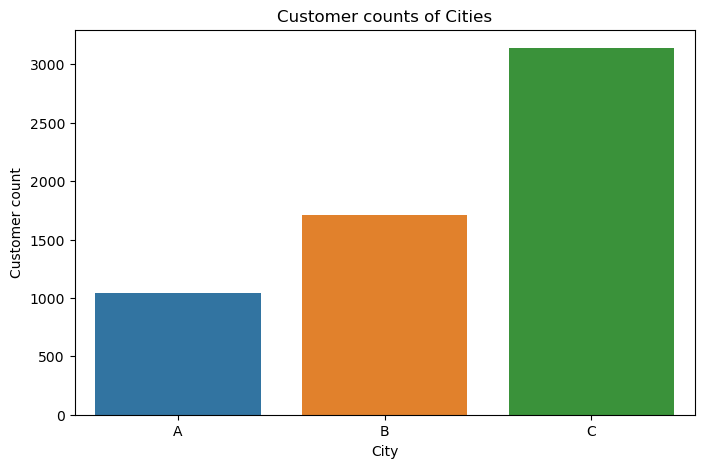

In [14]:
# Number of customers from each city

city_counts = df.groupby('City_Category')['User_ID'].nunique().reset_index(name='Customer_count')
plt.figure(figsize=(8,5))
sns.barplot(data=city_counts, x='City_Category', y='Customer_count')
plt.title('Customer counts of Cities')
plt.xlabel('City')
plt.ylabel('Customer count')

Although the number of customers in city 'B' is fewer than in city 'C', city 'B' has the highest total purchase among all three cities. Therefore, we can infer that customers in city 'B' tend to purchase more products on average.

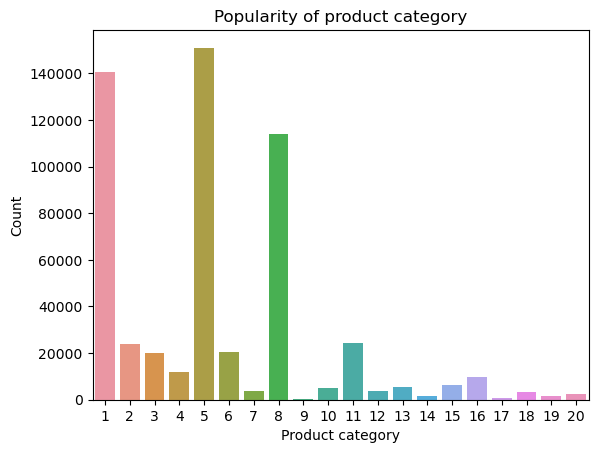

In [15]:
# Popularity of product category

product_category_count = df.groupby('Product_Category').size().reset_index(name='Count')
sns.barplot(data=product_category_count, x='Product_Category', y='Count')
plt.title('Popularity of product category')
plt.xlabel('Product category')
plt.ylabel('Count')

plt.show()

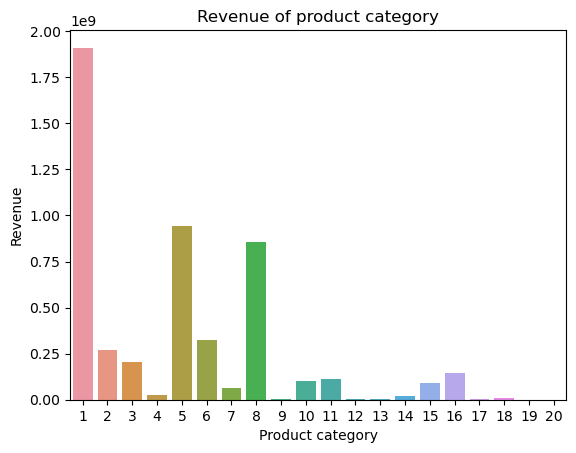

In [16]:
# Revenue from product categories

revenue_product_category = df.groupby('Product_Category')['Purchase'].sum().reset_index(name='Revenue')
sns.barplot(revenue_product_category, x='Product_Category', y='Revenue')
plt.title('Revenue of product category')
plt.xlabel('Product category')
plt.ylabel('Revenue')

plt.show()

Product categories 1, 5, and 8 are the most popular categories based on purchase frequency. Although the popularity of these three categories is nearly the same, product category 1 generates significantly higher revenue compared to categories 5 and 8.

In [ ]:
# idxmax() return index of maximum value in the given series or dataframe. In dataframe it returns max value index 
# in all columns or rows according to specified axis.

In [20]:
# Product category that generates most revenue for all ages

mostPurchase_by_age = []

for a in df['Age'].unique():
    age_ =  df[df['Age']==a]
    purchase_by_age = age_.groupby('Product_Category')['Purchase'].sum().reset_index(name='Total_purchase')
    purchase_by_age.sort_values(by='Total_purchase', ascending=False)
    r = purchase_by_age.iloc[0]
    mostPurchase_by_age.append({
        'Age' : a,
        'Product_Category' : r['Product_Category'],
        'Tota_Purchase' : r['Total_purchase']
    })
    
mostPurchase_by_age = pd.DataFrame(mostPurchase_by_age)
mostPurchase_by_age

,Age,Product_Category,Tota_Purchase
0,0-17,1,48783247
1,55+,1,62041252
2,26-35,1,783813459
3,46-50,1,144311800
4,51-55,1,127824120
5,36-45,1,380631904
6,18-25,1,362607972


It appears that for all age groups, product category 1 generates the maximum revenue. The top three age groups in terms of total revenue are 26-35, 36-45, and 18-25, respectively.

In [31]:
mostPurchase_by_occup = []

for o in df['Occupation'].unique():
    occup_ =  df[df['Occupation']==o]
    purchase_by_occup = occup_.groupby('Product_Category')['Purchase'].sum().reset_index(name='Total_purchase')
    purchase_by_occup.sort_values(by='Total_purchase', ascending=False)
    r = purchase_by_occup.iloc[0]
    mostPurchase_by_occup.append({
        'Occupation' : o,
        'Product_Category' : r['Product_Category'],
        'Tota_Purchase' : r['Total_purchase']
    })
    
mostPurchase_by_occup = pd.DataFrame(mostPurchase_by_occup)
mostPurchase_by_occup

,Occupation,Product_Category,Tota_Purchase
0,10,1,44454766
1,16,1,89412306
2,15,1,47315579
3,7,1,222615985
4,20,1,89763366
5,9,1,15818102
6,1,1,136419027
7,12,1,128895824
8,17,1,177321667
9,0,1,235280682


It appears that for all occupations, product category 1 generates the maximum revenue. The top three occupations in terms of total revenue are 4, 0, and 7, respectively.

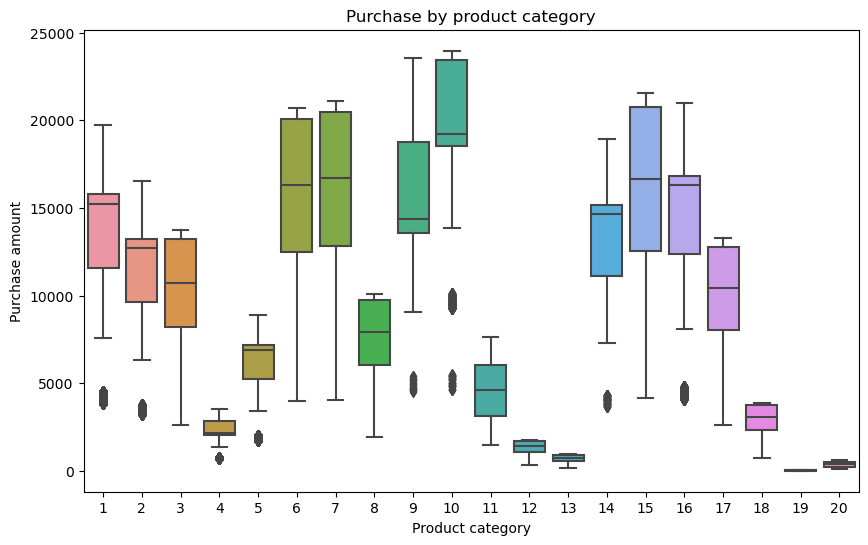

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Product_Category', y='Purchase')
plt.title('Purchase by product category')
plt.xlabel('Product category')
plt.ylabel('Purchase amount')

plt.show()